In [4]:
import gcsfs
import pandas as pd
import rdkit
from rdkit.Chem import Descriptors

from dvcx.catalog import get_catalog
from dvcx.error import DatasetNotFoundError
from dvcx.query import C, DatasetQuery, udf, Stream, Object
from dvcx.sql.types import String, Float, Int

# DVCx with `gs://` dataset

In [5]:
STORAGE = "gcs://dvc-cse/example-dvcx-pdb/refined-set"

wds = (
    DatasetQuery(STORAGE)
    .filter(C.name.glob("*.pdb"))
)

wds.to_pandas()

,id,vtype,dir_type,parent_id,parent,name,checksum,etag,version,is_latest,last_modified,size,owner_name,owner_id,anno,random,location,source
0,5583,,0,None,example-dvcx-pdb/refined-set/4i8z,4i8z_pocket.pdb,701ff828fb14b8125b300584ff120f80,CP3J7u3KlIUDEAE=,1711547382211837,1,2024-03-27 13:49:42.213000+00:00,49244,,,None,7876394450648053128,None,gcs://dvc-cse
1,5584,,0,None,example-dvcx-pdb/refined-set/4i8z,4i8z_protein.pdb,bc8f3e64963f26932a70cef814516d84,CLCXnu/KlIUDEAE=,1711547385088944,1,2024-03-27 13:49:45.090000+00:00,258294,,,None,7968632403922535475,None,gcs://dvc-cse
2,5587,,0,None,example-dvcx-pdb/refined-set/2ot1,2ot1_pocket.pdb,acf005cb8ec9c3d84288ecdcfe328706,CILtlqTOlIUDEAE=,1711548301424258,1,2024-03-27 14:05:01.425000+00:00,33681,,,None,720037767928717050,None,gcs://dvc-cse
3,5588,,0,None,example-dvcx-pdb/refined-set/2ot1,2ot1_protein.pdb,0c1b72a86b6130aa7cc441329038824b,CL6r1LLOlIUDEAE=,1711548331791806,1,2024-03-27 14:05:31.793000+00:00,1846684,,,None,3317633627077577445,None,gcs://dvc-cse
4,5591,,0,None,example-dvcx-pdb/refined-set/2j27,2j27_pocket.pdb,13fa3209d453c06937c766e1f254c68d,CLfH7PTMlIUDEAE=,1711547933729719,1,2024-03-27 13:58:53.730000+00:00,32970,,,None,3773233841509539190,None,gcs://dvc-cse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,27192,,0,None,example-dvcx-pdb/refined-set/4xiq,4xiq_protein.pdb,eca6ceeacfa997d062acbbbf85a72ead,CIDZw5nOlIUDEAE=,1711548279090304,1,2024-03-27 14:04:39.091000+00:00,172560,,,None,4609661381895379386,None,gcs://dvc-cse
10628,27262,,0,None,example-dvcx-pdb/refined-set/2xj2,2xj2_pocket.pdb,b4f4a6f001a48eb08af035b29a4b82bc,CL7078rKlIUDEAE=,1711547308833342,1,2024-03-27 13:48:28.834000+00:00,40633,,,None,5917592521282146701,None,gcs://dvc-cse
10629,27263,,0,None,example-dvcx-pdb/refined-set/2xj2,2xj2_protein.pdb,93bee26eedde9ba5ac112932604db79f,CIab+9DKlIUDEAE=,1711547321601414,1,2024-03-27 13:48:41.603000+00:00,361011,,,None,4169761091398707587,None,gcs://dvc-cse
10630,27266,,0,None,example-dvcx-pdb/refined-set/4mme,4mme_pocket.pdb,f24122058daa1b5ee7bdb80f04ce1258,CKeHpLnOlIUDEAE=,1711548345680807,1,2024-03-27 14:05:45.682000+00:00,40233,,,None,8651941695035473975,None,gcs://dvc-cse


## Look over objects

In [6]:
def pdb_read(buf):
    return buf.read()

files = (
    wds.filter(C.name.glob("*.pdb"))
    .limit(10)
    .extract(Object(pdb_read), cache=False)   
)

files

<generator object DatasetQuery.extract at 0x17fa805e0>

In [7]:
for obj in files: 
    print(obj)

(b'HEADER    185L_POCKET\nCOMPND    185L_POCKET\nREMARK    GENERATED BY X-TOOL on Fri Nov 18 12:00:13 2016\nATOM      1  N   ALA A  74      29.422   8.023  16.103  1.00 15.03           N\nATOM      2  H   ALA A  74      30.396   7.938  16.458  1.00  0.00           H\nATOM      3  CA  ALA A  74      29.177   8.101  14.657  1.00 21.13           C\nATOM      4  C   ALA A  74      28.377   6.889  14.150  1.00 21.72           C\nATOM      5  O   ALA A  74      27.403   6.970  13.404  1.00 18.57           O\nATOM      6  CB  ALA A  74      30.498   8.245  13.883  1.00 13.06           C\nATOM      7  N   VAL A  75      28.823   5.747  14.575  1.00 17.74           N\nATOM      8  H   VAL A  75      29.659   5.725  15.193  1.00  0.00           H\nATOM      9  CA  VAL A  75      28.191   4.523  14.212  1.00 30.12           C\nATOM     10  C   VAL A  75      26.776   4.571  14.722  1.00 27.54           C\nATOM     11  O   VAL A  75      25.824   4.308  13.998  1.00 23.83           O\nATOM     12 

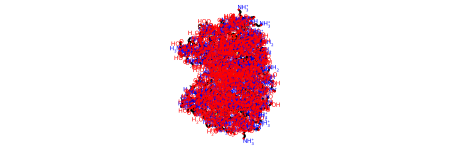

In [8]:
# Convert the PDB string to an RDKit molecule
mol = rdkit.Chem.MolFromPDBBlock(obj[0].decode('utf-8'))
mol

## UDF to add molecule descriptors 

In [9]:
# @udf(params=('source', 'parent', 'name',), 
#      output={'MolWt': Float, 'LogP': Float, 'NumHDonors': Int, 'NumHAcceptors': Int})
# def calculate_descriptors(source, parent, name):
#     """
#     Given a file path to a .mol file, calculate and return molecular descriptors.
#     """

#     # Read a file 
#     gcs_path = source + '/' + parent + '/' + name
#     fs = gcsfs.GCSFileSystem()
#     with fs.open(gcs_path, 'r') as f:
#         pdb_content = f.read()
    
#     # Convert the PDB content to an RDKit molecule
#     mol = rdkit.Chem.MolFromPDBBlock(pdb_content)
    
#     if mol:
#         mol_weight = Descriptors.MolWt(mol)
#         logP = Descriptors.MolLogP(mol)
#         hb_donors = Descriptors.NumHDonors(mol)
#         hb_acceptors = Descriptors.NumHAcceptors(mol)
#         return (mol_weight, logP, hb_donors, hb_acceptors,)
#     else:
#         return None


@udf(params=(Stream(),), 
     output={'MolWt': Float, 'LogP': Float, 'NumHDonors': Int, 'NumHAcceptors': Int})
def calculate_descriptors(stream):
    """
    Given a file path to a .mol file, calculate and return molecular descriptors.
    """
   # Read a file 
    with stream as raw:
      pdb_content = raw.read().decode("utf-8")
      # print(pdb_content)
    
    # Convert the PDB content to an RDKit molecule
    mol = rdkit.Chem.MolFromPDBBlock(pdb_content)
    
    if mol:
        mol_weight = Descriptors.MolWt(mol)
        logP = Descriptors.MolLogP(mol)
        hb_donors = Descriptors.NumHDonors(mol)
        hb_acceptors = Descriptors.NumHAcceptors(mol)
        return (mol_weight, logP, hb_donors, hb_acceptors,)
    else:
        return None


In [10]:
pdb_data_extended = (
    DatasetQuery(STORAGE)
    .filter(C.name.glob("*.pdb"))
    .limit(10)
    .add_signals(calculate_descriptors)
)

In [11]:
import time
start_time = time.time()

display(pdb_data_extended.to_pandas())

print("--- %s seconds ---" % (time.time() - start_time))

,id,vtype,dir_type,parent_id,parent,name,checksum,etag,version,is_latest,...,owner_name,owner_id,anno,random,location,source,MolWt,LogP,NumHDonors,NumHAcceptors
0,1,,0,None,example-dvcx-pdb/refined-set/4i8z,4i8z_pocket.pdb,701ff828fb14b8125b300584ff120f80,CP3J7u3KlIUDEAE=,1711547382211837,1,...,,,None,7876394450648053128,None,gcs://dvc-cse,7476.915,-54.2310,96,101
1,2,,0,None,example-dvcx-pdb/refined-set/4i8z,4i8z_protein.pdb,bc8f3e64963f26932a70cef814516d84,CLCXnu/KlIUDEAE=,1711547385088944,1,...,,,None,7968632403922535475,None,gcs://dvc-cse,23913.804,-231.4588,290,262
2,3,,0,None,example-dvcx-pdb/refined-set/2ot1,2ot1_pocket.pdb,acf005cb8ec9c3d84288ecdcfe328706,CILtlqTOlIUDEAE=,1711548301424258,1,...,,,None,720037767928717050,None,gcs://dvc-cse,5091.809,-59.7470,69,67
3,4,,0,None,example-dvcx-pdb/refined-set/2ot1,2ot1_protein.pdb,0c1b72a86b6130aa7cc441329038824b,CL6r1LLOlIUDEAE=,1711548331791806,1,...,,,None,3317633627077577445,None,gcs://dvc-cse,185656.501,-1560.6341,1000,1000
4,5,,0,None,example-dvcx-pdb/refined-set/2j27,2j27_pocket.pdb,13fa3209d453c06937c766e1f254c68d,CLfH7PTMlIUDEAE=,1711547933729719,1,...,,,None,3773233841509539190,None,gcs://dvc-cse,5013.798,-40.4854,64,74
5,6,,0,None,example-dvcx-pdb/refined-set/2j27,2j27_protein.pdb,c779d6a75357eb75aafe3a130608ef64,CPDatP3MlIUDEAE=,1711547951689072,1,...,,,None,8558971036488395579,None,gcs://dvc-cse,65736.226,-985.9256,758,676
6,7,,0,None,example-dvcx-pdb/refined-set/3su5,3su5_pocket.pdb,2eace4147bee8c8e1889ebf5637502e5,CIbl+a7MlIUDEAE=,1711547787145862,1,...,,,None,3626018802913056081,None,gcs://dvc-cse,5839.689,-57.2686,79,79
7,8,,0,None,example-dvcx-pdb/refined-set/3su5,3su5_protein.pdb,bf5bd8ba976e5350118868bde75e279b,CPTr4rHMlIUDEAE=,1711547793061364,1,...,,,None,3016587128701962653,None,gcs://dvc-cse,23783.691,-292.6437,305,278
8,9,,0,None,example-dvcx-pdb/refined-set/5kqy,5kqy_pocket.pdb,b3baa8df08ea63c49321884e187804f5,CLPqgJPKlIUDEAE=,1711547191670067,1,...,,,None,2761552271230365708,None,gcs://dvc-cse,6917.232,-56.1059,89,90
9,10,,0,None,example-dvcx-pdb/refined-set/5kqy,5kqy_protein.pdb,c70d71325a914a3975f111d1f79edacb,CJe/oZTKlIUDEAE=,1711547194302359,1,...,,,None,1952360267291925112,None,gcs://dvc-cse,25703.238,-322.8354,286,256


--- 22.117053031921387 seconds ---
